# General Exercises

### Exercise 1 - Piecewise polynomial interpolation

1. Write a function `phi(x)` that computes the following function

$$
\phi(x) = \left\{\begin{array}{ll}
\left(1-\frac{x}{2}\right)^4\, \left(1+\frac{x}{2}\right)^4\,
& \text{ if } \left|\frac{x}{2}\right|\leq 1, \\[2ex]
0 & \text{ otherwise}. \end{array}\right.
$$

Plot the function $x\mapsto \phi(x)$ on the interval $[-3,3]$. Check that the function is smooth in the interval $[-3,3]$.

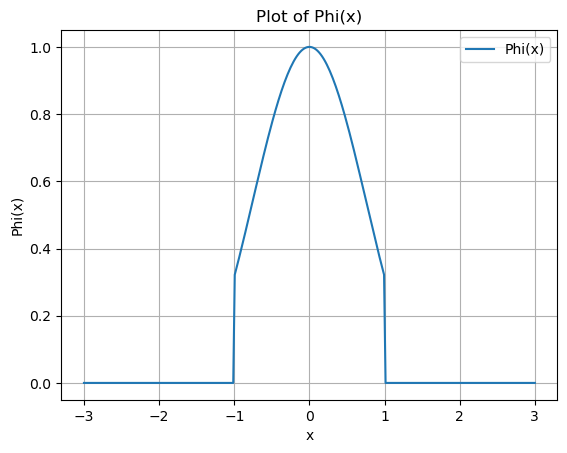

In [117]:
import numpy as np
import matplotlib.pyplot as plt

def phi(x):
    x = np.asarray(x)
    phi= np.zeros_like(x)
    
    mask = np.abs(x) <= 1
    
    phi[mask] = (1 - x[mask]/2)**4 * (1 + x[mask]/2)**4
    
    return phi

xd = np.linspace(-3, 3, 300)
plt.plot(xd, phi(xd), label="Phi(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("Phi(x)")
plt.title("Plot of Phi(x)")
plt.grid()
plt.show()

2. Write a function `f(x)` that implements the bell-shaped function

$$
f(x) = \frac{1}{1+x^2}.
$$

Plot the function in the interval $[-5,5]$. 

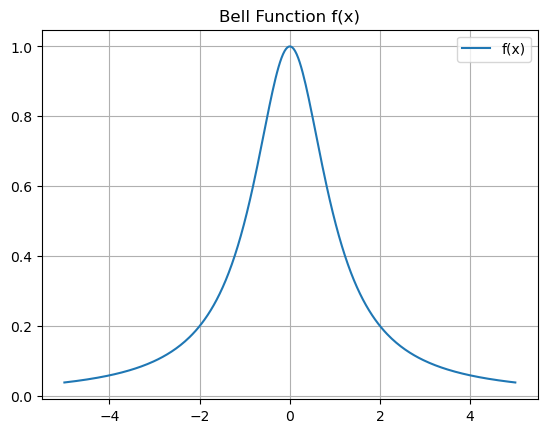

In [118]:
def f(x):
    return 1 / (1+x**2)

xd = np.linspace(-5, 5, 300)
plt.plot(xd, f(xd), label = "f(x)")
plt.title("Bell Function f(x)")
plt.grid()
plt.legend()

3. For an integer $N>0$, consider the array `xi` of interpolation points $x_i$ defined
by
```
xi = np.linspace(-5, 5, N)
```
and `yi` the array of values $y_i = f(x_i)$.

In this exercise, the following interpolation function is considered:

$$
p(x) = \sum_{i=0}^{N-1} \alpha_i\, \phi\left(\frac{x-x_i}{h}\right) 
$$

where $h = \dfrac{10}{N}$. The coefficients $\alpha_i$ are computed in order to fulfill the interpolation conditions

$$
p(x_i) = y_i \quad \forall i=0,..., N-1.
$$

That leads to a linear system

$$
A \mathbf{\alpha} = \mathbf{y}
$$

where $A$ is the matrix $N\times N$ of elements

$$
a_{ij} = \phi\left(\frac{x_i-x_j}{h}\right)
$$

and $\mathbf{b}=(y_0,...,y_{N-1})$ (i.e. the array `yi`). 

Consider $N=11$. Write a `python` code that computes the matrix $A$. 

Print the matrix $A$. 

Display the mask (nonzero elements) of the matrix $A$ by using `matplotlib.pyplot.spy(A)` (use ```?spy``` for documentation).

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


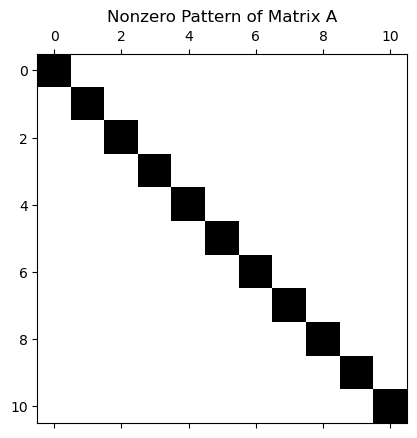

In [119]:
N = 11
xi = np.linspace(-5, 5, N)
h = 10 / N

A = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        A[i, j] = phi((xi[i] - xi[j]) / h)

print(np.round(A, 2))


plt.spy(A)
plt.title("Nonzero Pattern of Matrix A")
plt.show()

4. Then solve the linear system (one could use `numpy.linalg.solve()`) to get the vector $\mathbf{\alpha}$.

Print the vector $\mathbf{\alpha}$.

In [120]:
import numpy.linalg as la

yi = f(xi)
a = la.solve(A, yi)

print(a)

[0.03846154 0.05882353 0.1        0.2        0.5        1.
 0.5        0.2        0.1        0.05882353 0.03846154]


5. Write a function `p(x)` that computes

$$
p(x) = \sum_{i=0}^{N-1} \alpha_i\, \phi\left(\frac{x-x_i}{h}\right) 
$$

In [121]:
def p(x):
    p = 0
    for i in range(N):
        p += a[i]* phi((x - x[i]) / h)
    return p


6. Consider $N=11$. Using `matplotlib.pyplot`, plot the function $x\mapsto p(x)$ on the interval $[-5,5]$.

On the same figure, also plot the interpolation points with markers and the original function $f(x)$ in solid line.

Add legends.

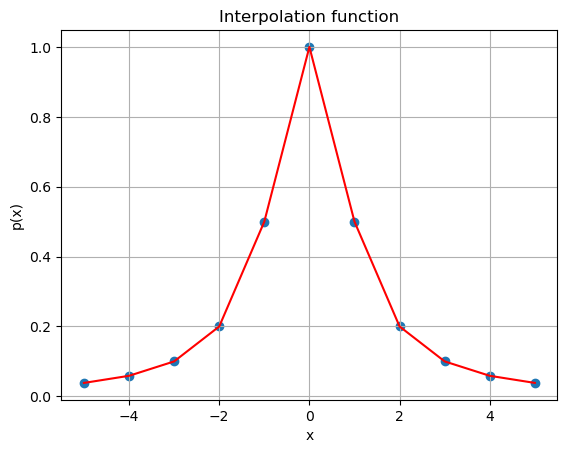

In [122]:
plt.plot(xi, p(xi), 'r')
plt.scatter(xi, yi)
plt.title("Interpolation function")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid()


7. Do the same thing for the respective values $N=15$, $21$, $31$, $51$. Comment the result in a `python` comment.

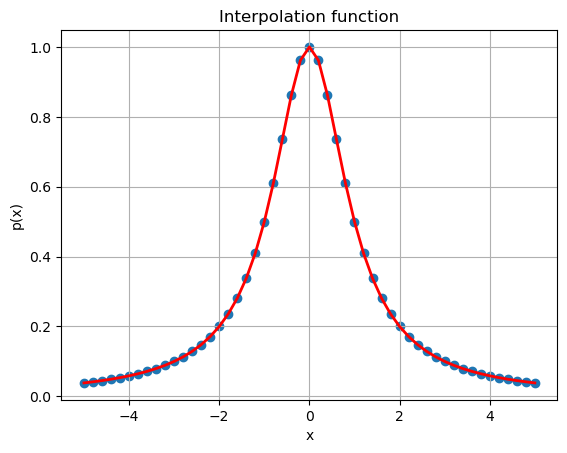

In [123]:
N = 51 #15 21, 31, 
xi = np.linspace(-5, 5, N)
h = 10 / N


A = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        A[i, j] = phi((xi[i] - xi[j]) / h)

yi = f(xi)
a = la.solve(A, yi)

plt.plot(xi, p(xi), 'r', lw = 2)
plt.title("Interpolation function")
plt.scatter(xi, yi)
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid()

In [124]:
#Comment: AS we increase the number of interpolation points, we can see 
#that our interpolation function gets closer to the true function f(x)

### Exercise 2 - Differential system: double-well potential

Let us consider the potential

$$
\phi(x) = x^4 - 2 x^2 + 1
$$

and the dynamical system

\begin{align*}
& \frac{dx(t)}{dt} = v(t), \\[1.3ex]
& \frac{dv(t)}{dt} = -\phi'(x(t)) - a\, v(t)
\end{align*}

with $a=0.1$. First, check that $\phi'(x) = 4x(x-1)(x+1)$.

Implement a function ```phi(x)``` that computes $\phi(x)$, a function ```phiprim(x)``` that computes $\phi'(x)$, and a `python` function

```
def F(y,t):
    # ...
```

where $\mathbf{y}=(x,v)$, that computes the mapping

$$
F(y, t) = \begin{pmatrix}
v \\
-\phi'(x) - a\,v
\end{pmatrix}.
$$

In [125]:
a = 0.1
def phi(x):
    return (x**4 - 2*x**2 + 1)

def phiprim(x):
    return 4*x**3 - 4*x

def F(y,t):
    x,v = y
    dxdt = v
    dvdt = -phiprim(x) - a * v
    return np.array([dxdt, dvdt])

The initial conditions are $x(0)=0$ and $v(0)=2$.
The time window is $[0,T]$ with $T=100$. Use the array of discrete times:
```
td = np.linspace(0.0, T, 2000)
```
Solve the problem numerically, using ```odeint()``` from ```scipy.integrate```. 

Then plot the solution in the phase plane $(x,v)$. 


In [126]:
y0 = np.array([0 ,2])
T = 100
td = np.linspace(0.0, T, 2000)

from scipy.integrate import odeint

ysol = odeint(F, y0, td)

x = ysol[:,0]
v = ysol[:,1]

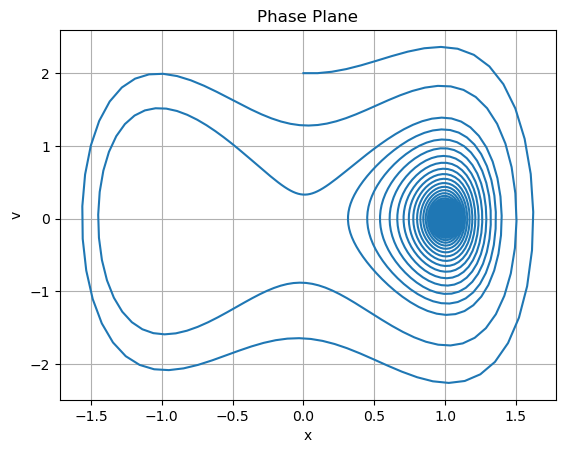

In [127]:
plt.plot(x, v)
plt.title("Phase Plane")
plt.xlabel("x")
plt.ylabel("v")
plt.grid()

Also plot $t\mapsto x(t)$ and $v\mapsto v(t)$ as time series.

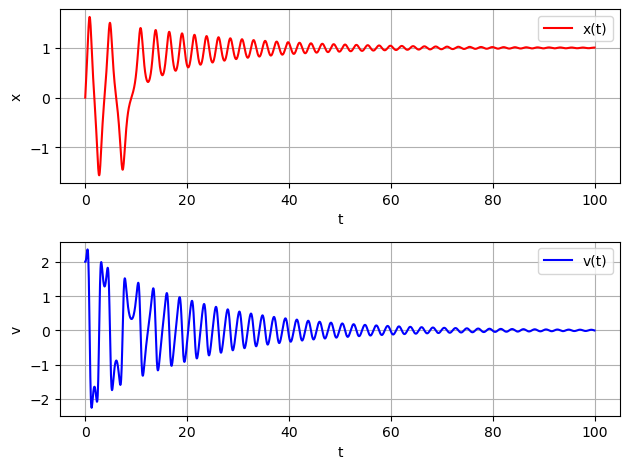

In [128]:
plt.subplot(2,1,1)
plt.plot(td, x, 'r', label = "x(t)")
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(td, v, 'b', label = "v(t)")
plt.xlabel("t")
plt.ylabel("v")
plt.grid()
plt.legend()

plt.tight_layout()

The double-well potential system has a total energy $E$ (sum of the kinetic energy and potential energy) defined by

$$
E = \frac{v^2}{2} + \phi(x).
$$

One can show that the energy decays in time according to the law

$$
\frac{dE(t)}{dt} = -a\, v^2 \leq 0.
$$

Compute and plot the energy time series $t\mapsto E(t)$ and check that the total energy goes to 0 as
$t\to +\infty$.

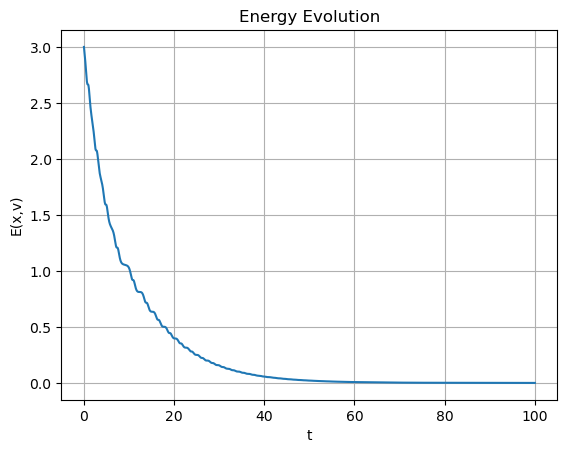

In [129]:
def E(x,v):
    return v**2/2 + phi(x)

plt.plot(td, E(x,v))
plt.title("Energy Evolution")
plt.xlabel("t")
plt.ylabel("E(x,v)")
plt.grid()

### Exercise 3 - Inverse problem, parameter estimation

As seen in the course, a simplified cell growth model with saturation gives the evolution of the cell density
$\rho(t)$ during time $t$ as
$$
\rho(t) = \rho_M\, \frac{e^{\alpha t}}{\frac{\rho_M}{\rho_0}-1 + e^{\alpha t}},
\qquad t>0,
$$

where $\rho_0$ is the initial density, $\rho_M$ is the maximum density, and $\alpha$ is the exponential growth rate when conditions are far from saturation. 

Define a `python` function ```rho(t)``` that computes $\rho(t)$ with the parameters $\rho_0=3$, 
$\rho_M=1000$ and $\alpha=1.2$. Then plot the function in the time range $[0,10]$.


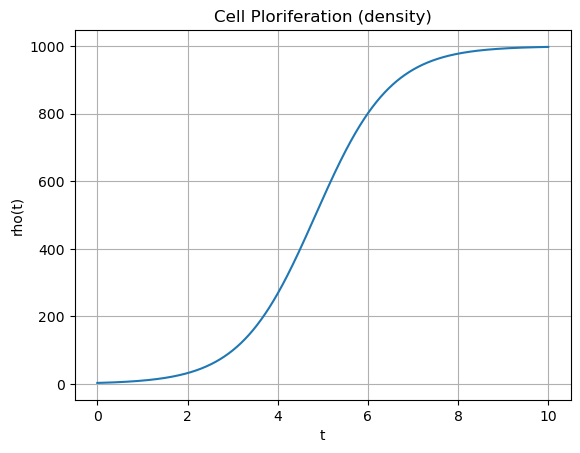

In [130]:
rho0 = 3
rhoM = 1000
a = 1.2

def rho(t):
    return (rhoM * np.exp(a * t))/(rhoM/rho0 - 1 + np.exp(a*t))

td = np.linspace(0, 10, 2000)

plt.plot(td, rho(td))
plt.title("Cell Ploriferation (density)")
plt.xlabel("t")
plt.ylabel("rho(t)")
plt.grid()

Practically, the parameters $\rho_0$, $\rho_M$ and $\alpha$ are not observables, and are not known.

From three measurements of cell density at three independent instants during cell proliferation, one can expect to estimate the three parameters $\rho_0$, $\rho_M$
and $\alpha$ of the model.

Suppose that the three measurements are the following:

| Time $t^k$        | Density $\rho(t^k)$ | 
| :---------------- | :------: | 
| 2.0               |   32.104 | 
| 4.0               |  267.726 | 
| 8.0               |  977.987 | 

From the measurements, we want to estimate the parameters $\rho_0$, $\rho_M$ and $\alpha$.

For that, write the system of equations $\mathbf{F}(\mathbf{x})=0$ to solve.

Using `scipy.optimize.fsolve()`, solve the problem. One could use the following
initial guess:

```
X0 = np.array([1.0, 2000.0, 1.0]) # X0=(rho0, rhoM, alpha) initial guess values
```

Print the values obtained for $\rho_0$, $\rho_M$ and $\alpha$.
Give the values by rounding them to 4 digits, using `np.round(...,4)`.

In [131]:
def F(x):
    rho0, rhoM, a = x

    t = 2.0
    pt = 32.104
    f1 = (rhoM * np.exp(a * t))/(rhoM/rho0 - 1 + np.exp(a*t)) - pt

    t = 4.0
    pt = 267.726
    f2 = (rhoM * np.exp(a * t))/(rhoM/rho0 - 1 + np.exp(a*t)) - pt

    t = 8.0
    pt = 977.987
    f3 = (rhoM * np.exp(a * t))/(rhoM/rho0 - 1 + np.exp(a*t)) - pt

    return np.array([f1,f2,f3])

In [132]:
from scipy.optimize import fsolve

x0 = np.array([1.0, 2000.0, 1.0])

xsol = fsolve(F, x0)

rhoSol = xsol[0]
rhoMsol = xsol[1]
alphaSol = xsol[2]

print("rho0 = ", np.round(rhoSol, 4))
print("rhoM = ", np.round(rhoMsol, 4))
print("alpha = ", np.round(alphaSol, 4))

rho0 =  3.0001
rhoM =  1000.0034
alpha =  1.2
